## Train Agent on Osu Environment using PPO LSTM

In [1]:
from environment import OsuEnvironment
from ppo_agent import PPO_Agent
from model import LSTM_Actor, LSTM_Critic
import torch
import torch.nn as nn
import torch.optim as optim
import os
import warnings
import logging

if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5
    !pip install -r yolov5/requirements.txt

warnings.simplefilter("ignore", FutureWarning)
logging.getLogger('ultralytics').setLevel(logging.ERROR)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
# define arguments for Agent
env = OsuEnvironment(num_frame=8)
behavior_cloning = True
hidden_size = 128
num_layer = 1
dropout = 0.1
batch_size = 64
n_epoch = 5

actor_net = LSTM_Actor(env.observation_space, env.action_space.nvec, hidden_size=hidden_size, num_layer=num_layer, dropout=dropout).to(device)
critic_net = LSTM_Critic(env.observation_space, hidden_size=hidden_size, num_layer=num_layer, dropout=dropout).to(device)

actor_optimizer = optim.Adam(actor_net.parameters(), lr=0.001)
critic_optimizer = optim.Adam(critic_net.parameters(), lr=0.001)

agent = PPO_Agent(env=env, 
                  actor_net=actor_net, 
                  critic_net=critic_net,
                  actor_optimizer=actor_optimizer, 
                  critic_optimizer=critic_optimizer, 
                  batch_size=batch_size,
                  n_epoch=n_epoch, 
                  behavior_cloning=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\bohui/.cache\torch\hub\master.zip
YOLOv5  2024-12-4 Python-3.11.5 torch-2.5.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Listening on 127.0.0.1:5555


In [3]:
agent.pretrain(total_episode=200)

Episod 10, pre-training loss: 0.07571160052627818
Episod 20, pre-training loss: 0.051033603053376494
Episod 30, pre-training loss: 0.0391063561318409
Episod 40, pre-training loss: 0.03171126163599764
Episod 50, pre-training loss: 0.025670114701041483
Episod 60, pre-training loss: 0.021602206801450405
Episod 70, pre-training loss: 0.01835043249118547
Episod 80, pre-training loss: 0.016010976259906304
Episod 90, pre-training loss: 0.01441563909119894
Episod 100, pre-training loss: 0.012317155670450438
Episod 110, pre-training loss: 0.01107117046163719
Episod 120, pre-training loss: 0.010654119705032612
Episod 130, pre-training loss: 0.009963415628311005
Episod 140, pre-training loss: 0.009448958714852684
Episod 150, pre-training loss: 0.009381626795615087
Episod 160, pre-training loss: 0.00844843886331173
Episod 170, pre-training loss: 0.008585468256976913
Episod 180, pre-training loss: 0.007751750995064089
Episod 190, pre-training loss: 0.008132783934488646
Episod 200, pre-training loss

In [13]:
%matplotlib inline

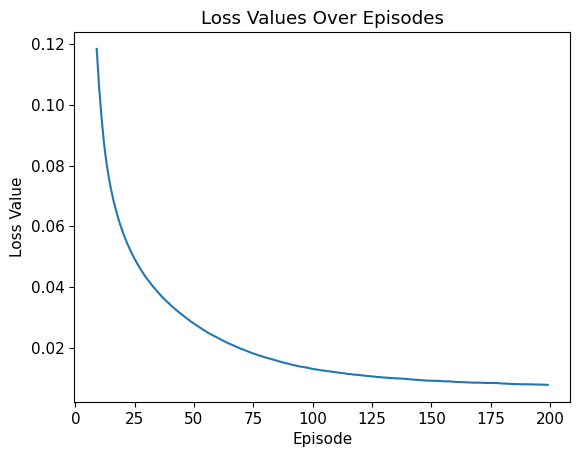

In [12]:
agent.plot(pretrain=True)

In [6]:
agent.eval(pretrain=True)

Accuracy:  0.9559915318136999


Timeout
Timeout


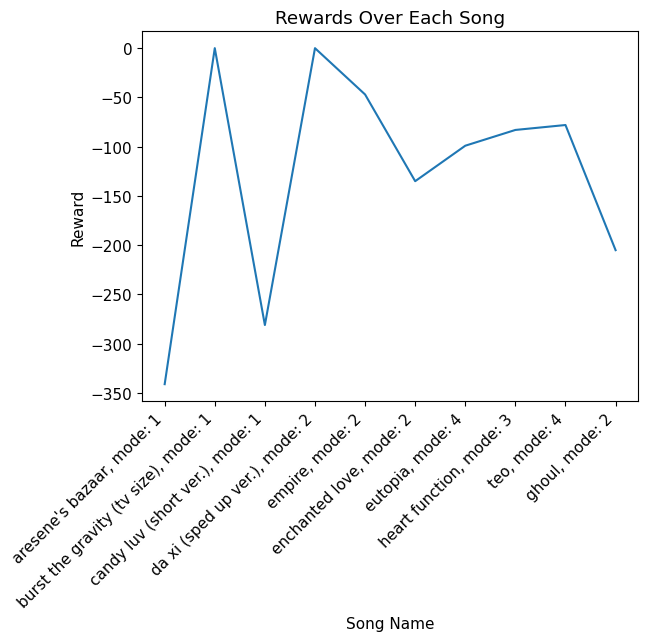

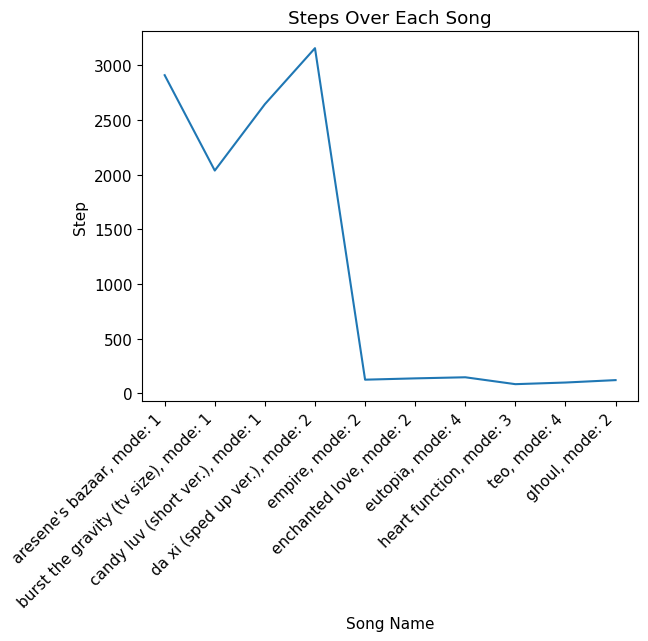

In [10]:
agent.eval()

In [5]:
agent.saveModel("ppo_8_1", pretrain=True)

Model Saved


In [ ]:
agent.train(total_episode=500, c=0.015, expert_weight=0.4, margin=1)

Episode 30: Total Reward: -2107, Loss: 0.11106207870239307
Timeout
Episode 40: Total Reward: -103, Loss: 0.4544622957706451
Timeout
Episode 50: Total Reward: -254, Loss: 0.17983192931860686
Episode 60: Total Reward: -156, Loss: 0.48790174126625063
Timeout
Timeout
Episode 70: Total Reward: 0, Loss: 0.4472679555416107
Timeout
Episode 80: Total Reward: -1528, Loss: 0.10997280401130105
Timeout
Episode 90: Total Reward: -46, Loss: 0.4439292252063751
Timeout
Episode 100: Total Reward: -122, Loss: 0.47404884099960326
Timeout
Episode 110: Total Reward: -209, Loss: 0.4666815042495728
Timeout
Episode 120: Total Reward: -220, Loss: 0.47879559397697447
Timeout
Episode 130: Total Reward: 0, Loss: 0.48121300935745237
Timeout
Episode 140: Total Reward: -202, Loss: 0.4846621572971344
Timeout
Episode 150: Total Reward: -118, Loss: 0.4700548708438873
Timeout
Episode 160: Total Reward: -109, Loss: 0.4612284481525421
Timeout
Episode 170: Total Reward: -275, Loss: 0.19154638275504113
Timeout
Episode 180: T

In [15]:
agent.saveModel("ppo_8_1", pretrain=False)

Model Saved


In [16]:
%matplotlib inline

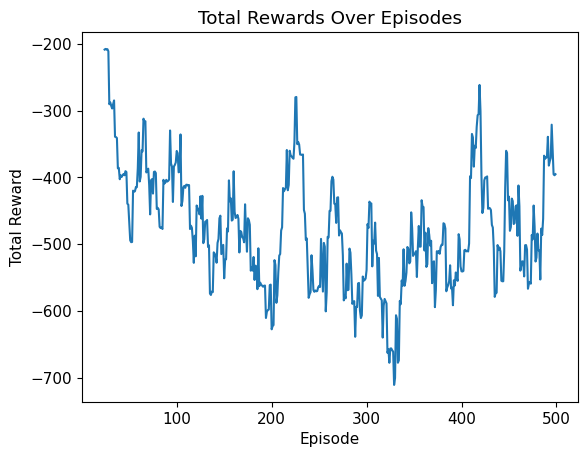

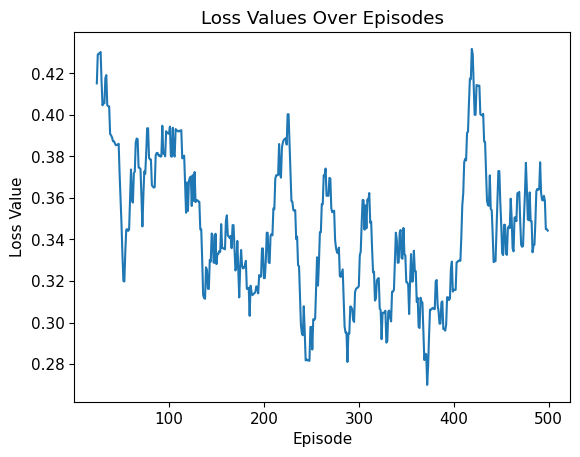

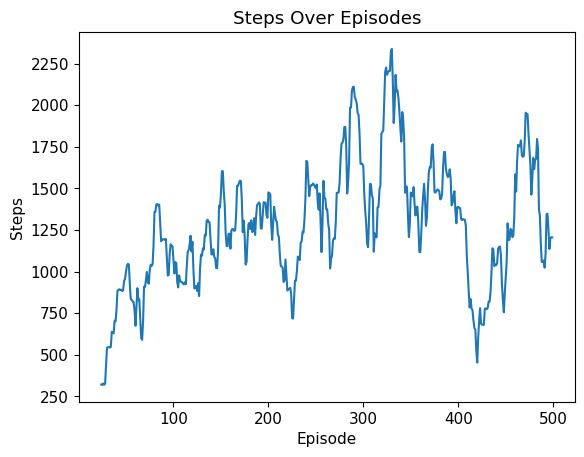

In [18]:
agent.plot()

Timeout
Timeout


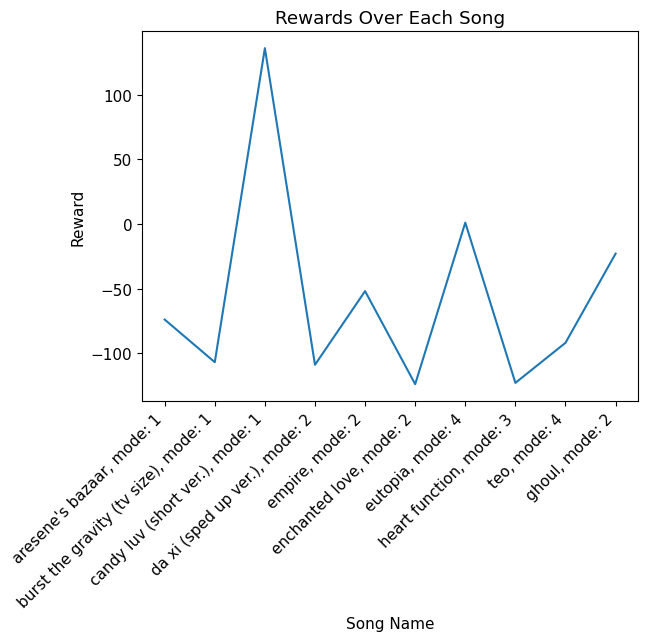

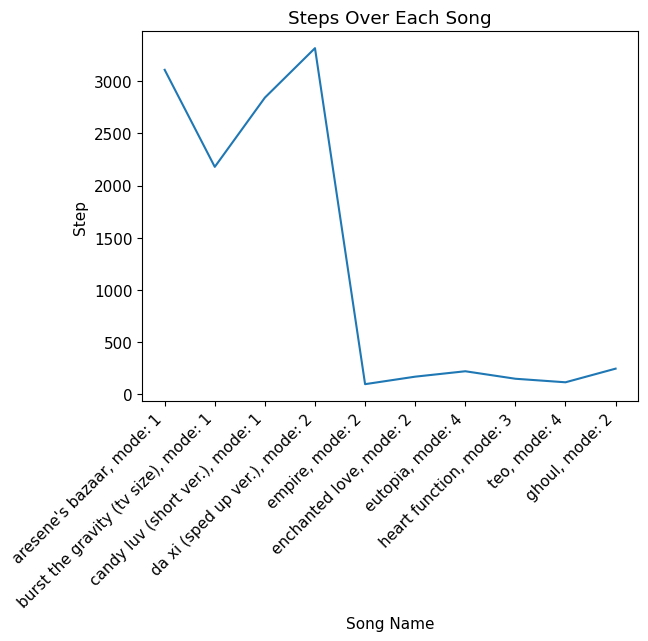

In [19]:
agent.eval()